<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터준비" data-toc-modified-id="데이터준비-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터준비</a></span><ul class="toc-item"><li><span><a href="#Resize-images" data-toc-modified-id="Resize-images-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resize images</a></span></li><li><span><a href="#Data-loading-함수작성-load_data()" data-toc-modified-id="Data-loading-함수작성-load_data()-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data loading 함수작성 load_data()</a></span></li><li><span><a href="#Train-Data를-load하여-정규화" data-toc-modified-id="Train-Data를-load하여-정규화-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Train Data를 load하여 정규화</a></span></li></ul></li><li><span><a href="#딥러닝-네트워크-설계하기" data-toc-modified-id="딥러닝-네트워크-설계하기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>딥러닝 네트워크 설계하기</a></span></li><li><span><a href="#모델학습" data-toc-modified-id="모델학습-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델학습</a></span></li><li><span><a href="#Test-data로-확인" data-toc-modified-id="Test-data로-확인-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test data로 확인</a></span><ul class="toc-item"><li><span><a href="#Resize-the-test-data" data-toc-modified-id="Resize-the-test-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Resize the test data</a></span></li><li><span><a href="#Test-data-loading" data-toc-modified-id="Test-data-loading-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Test data loading</a></span></li><li><span><a href="#정확도-확인" data-toc-modified-id="정확도-확인-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>정확도 확인</a></span></li></ul></li><li><span><a href="#하이퍼파라미터변경" data-toc-modified-id="하이퍼파라미터변경-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>하이퍼파라미터변경</a></span></li><li><span><a href="#시각화" data-toc-modified-id="시각화-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>시각화</a></span></li></ul></div>

# 데이터준비

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import glob
import os

print(tf.__version__)   # Tensorflow의 버전을 출력
print(np.__version__)
print("PIL 라이브러리 import 완료")

2.11.0
1.21.5
PIL 라이브러리 import 완료


In [2]:
os.environ['homepath']

'\\Users\\z002t5wz'

## Resize images

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv('homepath') + '/aiffel/rock_scissor_paper/train/scissor'
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv('homepath') + '/aiffel/rock_scissor_paper/train/rock'
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv('homepath') + '/aiffel/rock_scissor_paper/train/paper'
resize_images(image_dir_path)
print("보 이미지 resize 완료!")


2467  images to be resized.
2467  images resized.
가위 이미지 resize 완료!
2504  images to be resized.
2504  images resized.
바위 이미지 resize 완료!
2401  images to be resized.
2401  images resized.
보 이미지 resize 완료!


## Data loading 함수작성 load_data()

In [4]:
import numpy as np

def load_data_train(img_path, number_of_data=7372):  # 가위바위보 이미지 개수 총합에 주의.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


## Train Data를 load하여 정규화

In [5]:
# load_data_train()으로부터 데이터를 불러와 x_train(imgs), y_train(lables)에 할당
image_dir_path = os.getenv("homepath") + "/aiffel/rock_scissor_paper/train"
(x_train, y_train)=load_data_train(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 7372 입니다.
x_train_norm shape: (7372, 28, 28, 3)
y_train shape: (7372,)


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


라벨:  0


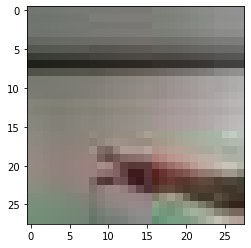

In [6]:
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계하기

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


# 입력부(28, 28, 3:'rgb')
# 출력부(3)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))   # 1st, 입력부(28, 28, 3:'rgb')
model.add(keras.layers.MaxPool2D(2,2))                                                         # 2nd
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))                                 # 3rd
model.add(keras.layers.MaxPooling2D((2,2)))                                                   # 4th
model.add(keras.layers.Flatten())                                                                  # 5th
model.add(keras.layers.Dense(32, activation='relu'))                                          # 6th
model.add(keras.layers.Dense(3, activation='softmax'))                                      # 7th, 출력부(3)

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()
print(x_train_norm.shape)
print(y_train.shape)



Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (No

# 모델학습

In [8]:
# model을 학습
# model.compile() - 학습의 환경설정 / model.fit() - 학습
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) # 분류에서는 accuracy, 회귀에서는 mse, rmse, r2, mae, mspe, mape, msle 

history = model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
231/231 [==============================] - 2s 7ms/step - loss: 0.9481 - accuracy: 0.5319
Epoch 2/10
231/231 [==============================] - 1s 6ms/step - loss: 0.5820 - accuracy: 0.7636
Epoch 3/10
231/231 [==============================] - 2s 7ms/step - loss: 0.4104 - accuracy: 0.8386
Epoch 4/10
231/231 [==============================] - 1s 6ms/step - loss: 0.3022 - accuracy: 0.8791
Epoch 5/10
231/231 [==============================] - 2s 7ms/step - loss: 0.2373 - accuracy: 0.9116
Epoch 6/10
231/231 [==============================] - 1s 6ms/step - loss: 0.1754 - accuracy: 0.9371
Epoch 7/10
231/231 [==============================] - 2s 7ms/step - loss: 0.1440 - accuracy: 0.9497
Epoch 8/10
231/231 [==============================] - 2s 7ms/step - loss: 0.1106 - accuracy: 0.9607
Epoch 9/10
231/231 [==============================] - 2s 7ms/step - loss: 0.0986 - accuracy: 0.9641
Epoch 10/10
231/231 [==============================] - 1s 6ms/step - loss: 0.0774 - accuracy: 0.9710

In [9]:
history.history

{'loss': [0.9480701684951782,
  0.581983745098114,
  0.41035783290863037,
  0.30224940180778503,
  0.23726259171962738,
  0.17535364627838135,
  0.1439920961856842,
  0.11055662482976913,
  0.09858005493879318,
  0.07736556977033615],
 'accuracy': [0.5318773984909058,
  0.7635648250579834,
  0.8385784029960632,
  0.8791372776031494,
  0.9115572571754456,
  0.9370591640472412,
  0.9496744275093079,
  0.9606619477272034,
  0.9640531539916992,
  0.9709712266921997]}

# Test data로 확인

## Resize the test data

In [10]:
# x_test, y_test 데이터 가져오기

image_dir_path = os.getenv("homepath") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("homepath") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("homepath") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)



100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


## Test data loading

In [11]:
def load_data_test(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("homepath") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data_test(image_dir_path)

print(x_test.shape)
print(y_test.shape)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

학습데이터(x_test)의 이미지 개수는 300 입니다.
(300, 28, 28, 3)
(300,)


라벨:  0


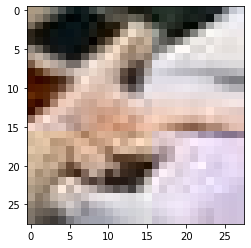

In [12]:
plt.imshow(x_train_norm[150])
print('라벨: ', y_train[150])

## 정확도 확인

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 3ms/step - loss: 3.0689 - accuracy: 0.4333
test_loss: 3.068885326385498 
test_accuracy: 0.4333333373069763


# 하이퍼파라미터변경

In [15]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=32
n_channel_2=32
n_dense=32
n_test_epoch=7

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
#model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
hiper_history = model.fit(x_test_norm, y_test, 
                  epochs=n_test_epoch, 
                  verbose=1
                 )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [20]:
hiper_history.history

{'loss': [1.004341959953308,
  0.6757344007492065,
  0.32319384813308716,
  0.13430020213127136,
  0.06858076900243759,
  0.05543602630496025,
  0.03372802957892418],
 'accuracy': [0.5633333325386047,
  0.8533333539962769,
  0.9633333086967468,
  0.9800000190734863,
  0.9800000190734863,
  0.9933333396911621,
  0.996666669845581]}

In [19]:
# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=1)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

10/10 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9967
test_loss: 0.019603051245212555 
test_accuracy: 0.996666669845581


# 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


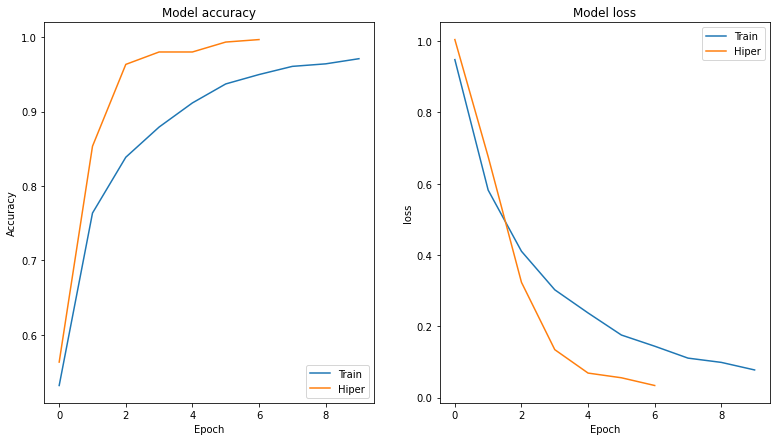

In [17]:
# 훈련 과정 시각화 (정확도)
fig = plt.figure(figsize=(13, 7))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(hiper_history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Hiper'], loc='lower right')
#plt.show()

# 훈련 과정 시각화 (손실)
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(hiper_history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Hiper'], loc='upper right')
plt.show()


###### 회고

        1st step: 
        training set 300 --> 7372개 후 정확도 33% --> 43% 증가      

        2nd step: 
        하이퍼 파라미터 변경 후 99% 로 증가
        - n_channel_1=32
        
        하이퍼파라미터 모델의 학습속도향상
        
        의문: 정확도가 너무 높아... 무언가 잘못된게 아닌가 의심스러움.. 하이퍼파라미터를 변경하지 않고 모델을 다시 수행했을때에도
        정확도가 올라갔음....이유가 뭘까????